<h1>Performance Measure (Binary & Non-Binary Classifier)</h1>

Measurement k-fold cross valdiation. its a resampling procedure used to evaluate machine learning models. 

<h2>How does it work?</h2>

We pick a k.

1. Randomly divide our training (test) data into k-subgroups, or folds of equal size.
2. The first fold is treated as a validation set, and the machine learing model on the remaining k-1 folds.
3. Calculating the MSE1 on the first fold.
4. Repeat steps 2-3 for the remaining k-1 folds.
5. CV = 1/k sum of MSE

Lets try using this to classify a simple binary data set.

In [26]:
import matplotlib.pyplot as plt

import matplotlib as mpl
from sklearn.datasets import fetch_openml
%matplotlib inline

In [ ]:
mnist = fetch_openml('mnist_784',version=1)

In [ ]:
mnist.keys()

In [ ]:
X, y = mnist['data'],mnist['target']

In [ ]:
X.shape #784 are column vectors

In [ ]:
y[0]

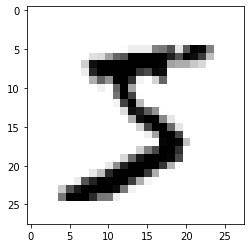

In [9]:
plt.imshow(X[0].reshape(28,28),cmap='binary')

In [10]:
import numpy as np

X_train, X_test = X[:60_000],X[60_000:]
y_train, y_test = y[:60_000],y[60_000:]
#they are currently strings, change them

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
y_train_5[1]

False

In [13]:
from sklearn.linear_model import SGDClassifier #stochatic gradient descent classifer

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict(X_train[0].reshape(1,-1))#reshape into a correct size

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [20]:
np.array([0.95035, 0.96035, 0.9604 ]).mean()

0.9570333333333334

We have 95% accuracy. how many of those data entries are 5? 

In [21]:
from sklearn.base import BaseEstimator

#for any data given, it is never a five

class never5Classifier(BaseEstimator):
    
    def fit(self,X,y = None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [22]:
never_5_clf = never5Classifier()

In [34]:
cross_val_score(never_5_clf,X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

It is 90% accurate. It means it is 90% accurate because 90% of the images are not five. not a good classifier. A better classifer that takes into account that the dataset does not have to many fives.

That is the confusion matrix.

The general idea is to count the number of instances class a are classifed as b.

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_predict = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

In [24]:
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_predict)

0.8370879772350012

Based of the precision score, the model is only 83% accurate the image is a 5. Whenever the precision increases, the recall decreases and vice versa.

In [48]:
recall_score(y_train_5,y_train_predict)

0.6511713705958311

When it is not a 5, it is only 65% accurate. 